DACON-손동작 분류 경진대회에 참여했습니다.

## 데이터 불러오기

In [2]:
import pandas as pd
sensor=pd.read_csv("C:/Users/user/Desktop/train.csv")

## 데이터 구조 훑어보기

In [3]:
sensor.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


In [28]:
#데이터 결측치
def check_missing_col(sensor):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(sensor.columns):
        missing_values = sum(sensor[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, sensor[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


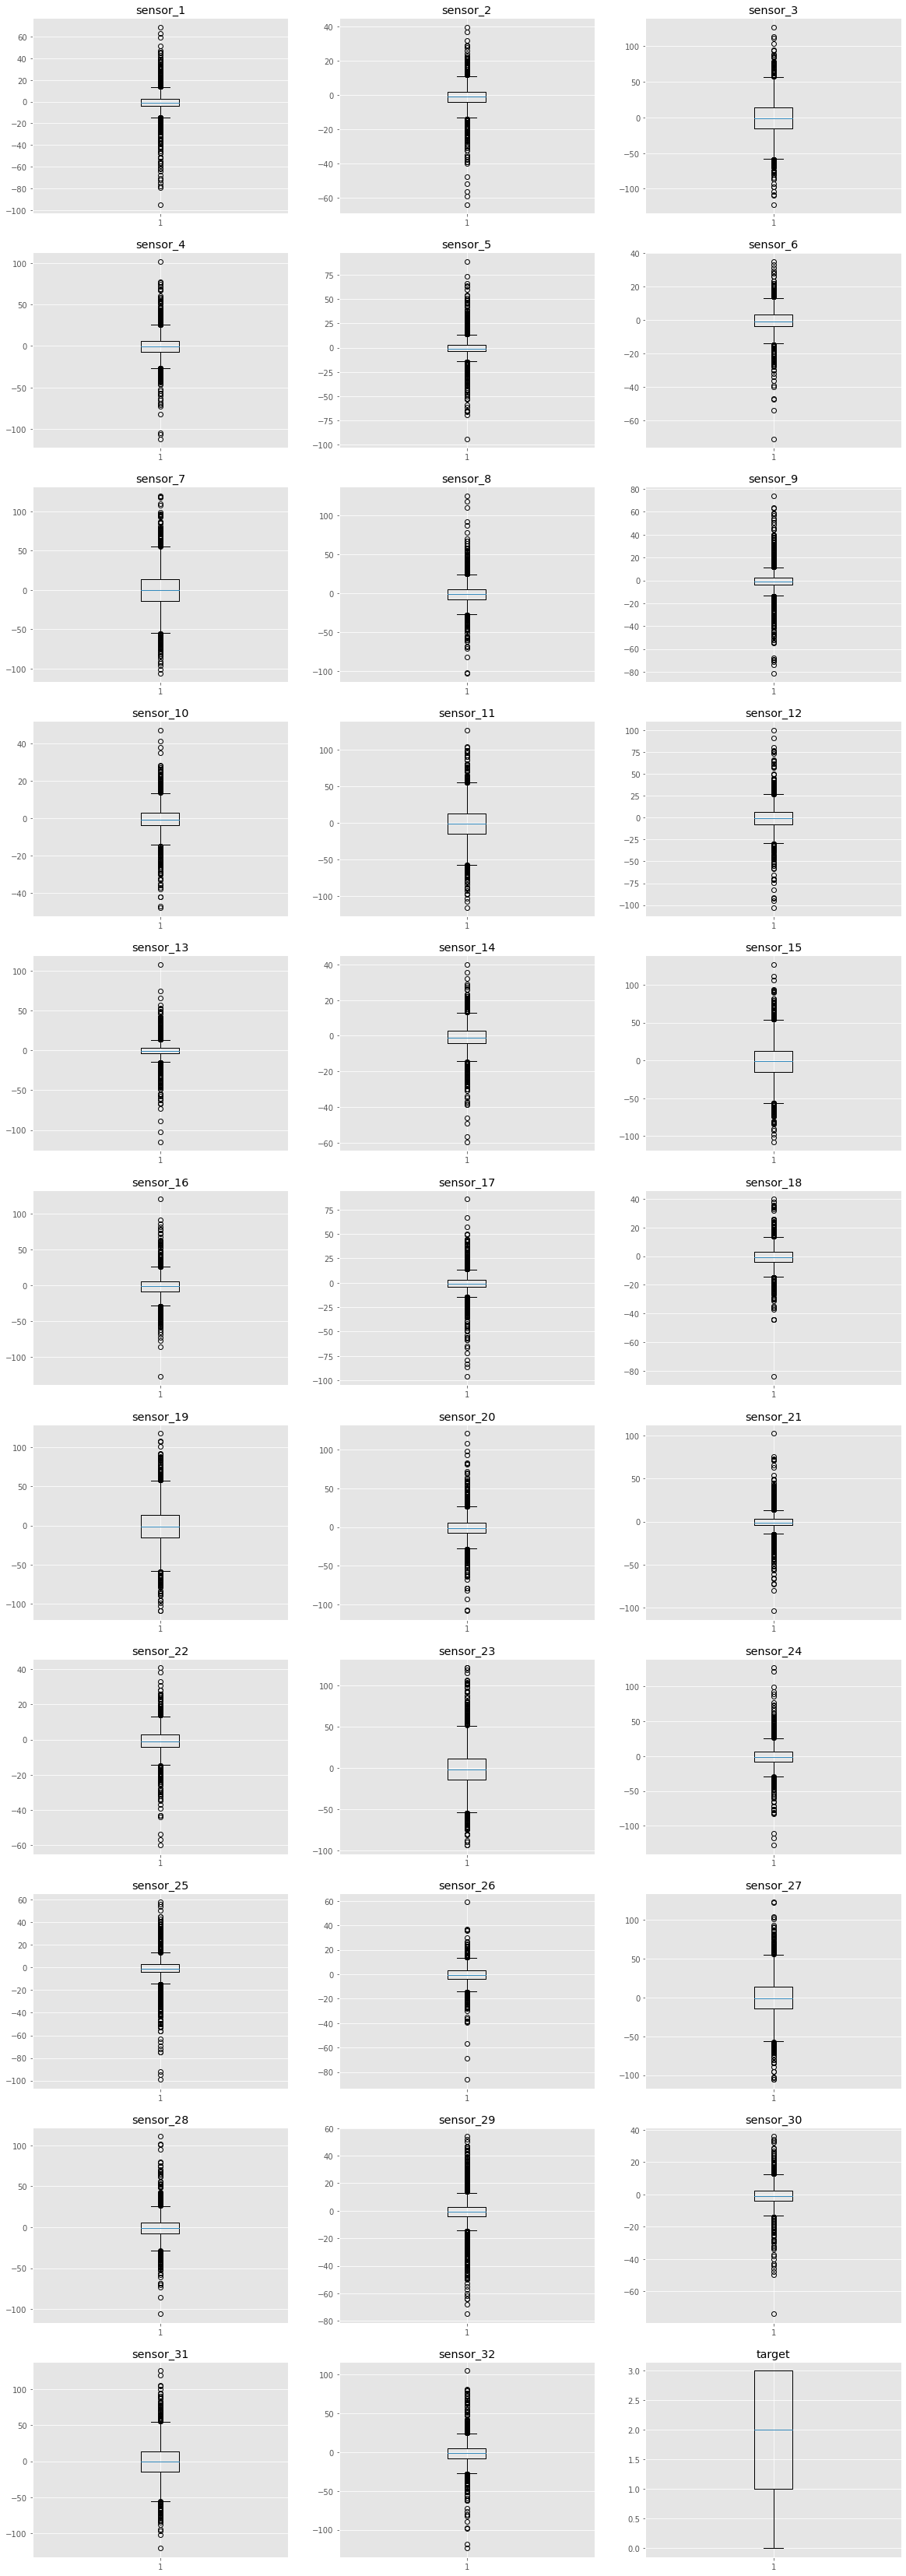

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = sensor.columns
# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.boxplot(sensor[feature[i]])
plt.show()

In [5]:
# 데이터 타입이 범주형인 target 빈도수 파악
sensor['target'].value_counts() # 이정도면 편향되지 않았다고 할 수 있음

3    599
2    593
1    574
0    569
Name: target, dtype: int64

In [6]:
#feature간의 상관관계 확인
X=sensor.drop('target',axis=1)
X.corr()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
id,1.000000,-0.047959,-0.000888,-0.013500,-0.017379,0.032179,-0.015231,0.037041,-0.005688,-0.024564,...,-0.007830,-0.001344,0.007976,0.036287,0.016731,0.005999,-0.016568,-0.007814,-0.025527,-0.030291
sensor_1,-0.047959,1.000000,0.089510,-0.014863,0.133260,-0.165601,-0.006924,-0.007083,-0.053089,-0.118079,...,-0.016110,-0.010171,0.071318,-0.011804,0.030132,0.023672,-0.017004,0.022611,0.016690,-0.018652
sensor_2,-0.000888,0.089510,1.000000,0.068790,0.056505,-0.049662,-0.224370,-0.095890,-0.086786,-0.024404,...,0.035841,0.011006,-0.022192,0.054226,-0.027150,-0.023783,-0.025482,0.029349,-0.003469,-0.003848
sensor_3,-0.013500,-0.014863,0.068790,1.000000,0.126943,-0.014903,-0.023781,-0.334553,-0.082429,0.000044,...,0.145320,0.028667,-0.004696,-0.000893,0.053824,0.028311,-0.014705,-0.002757,-0.037151,-0.043985
sensor_4,-0.017379,0.133260,0.056505,0.126943,1.000000,-0.007616,-0.010205,-0.012062,-0.370512,-0.015410,...,-0.012626,0.056225,0.025614,-0.014996,0.034144,0.120834,0.029611,0.066494,0.000102,-0.064024
sensor_5,0.032179,-0.165601,-0.049662,-0.014903,-0.007616,1.000000,0.107861,-0.023523,0.081025,-0.304084,...,-0.005123,-0.006828,0.139866,0.010908,-0.023287,-0.006755,0.052307,-0.004195,0.005234,-0.021886
sensor_6,-0.015231,-0.006924,-0.224370,-0.023781,-0.010205,0.107861,1.000000,0.065052,0.081256,-0.059777,...,0.006216,-0.004817,-0.006579,0.127302,0.007731,0.030834,0.028890,0.086592,-0.077735,-0.072532
sensor_7,0.037041,-0.007083,-0.095890,-0.334553,-0.012062,-0.023523,0.065052,1.000000,0.156873,0.029191,...,-0.170088,-0.059657,-0.009377,-0.043034,0.106018,0.026686,0.008321,-0.006077,0.061930,0.065185
sensor_8,-0.005688,-0.053089,-0.086786,-0.082429,-0.370512,0.081025,0.081256,0.156873,1.000000,0.024731,...,-0.023205,-0.108725,-0.002681,-0.037382,0.020659,0.059422,0.009128,-0.020435,0.014344,0.092971
sensor_9,-0.024564,-0.118079,-0.024404,0.000044,-0.015410,-0.304084,-0.059777,0.029191,0.024731,1.000000,...,-0.007722,-0.025909,-0.163510,0.013563,-0.005544,-0.001884,0.126576,-0.018774,0.009564,0.065943


<AxesSubplot:>

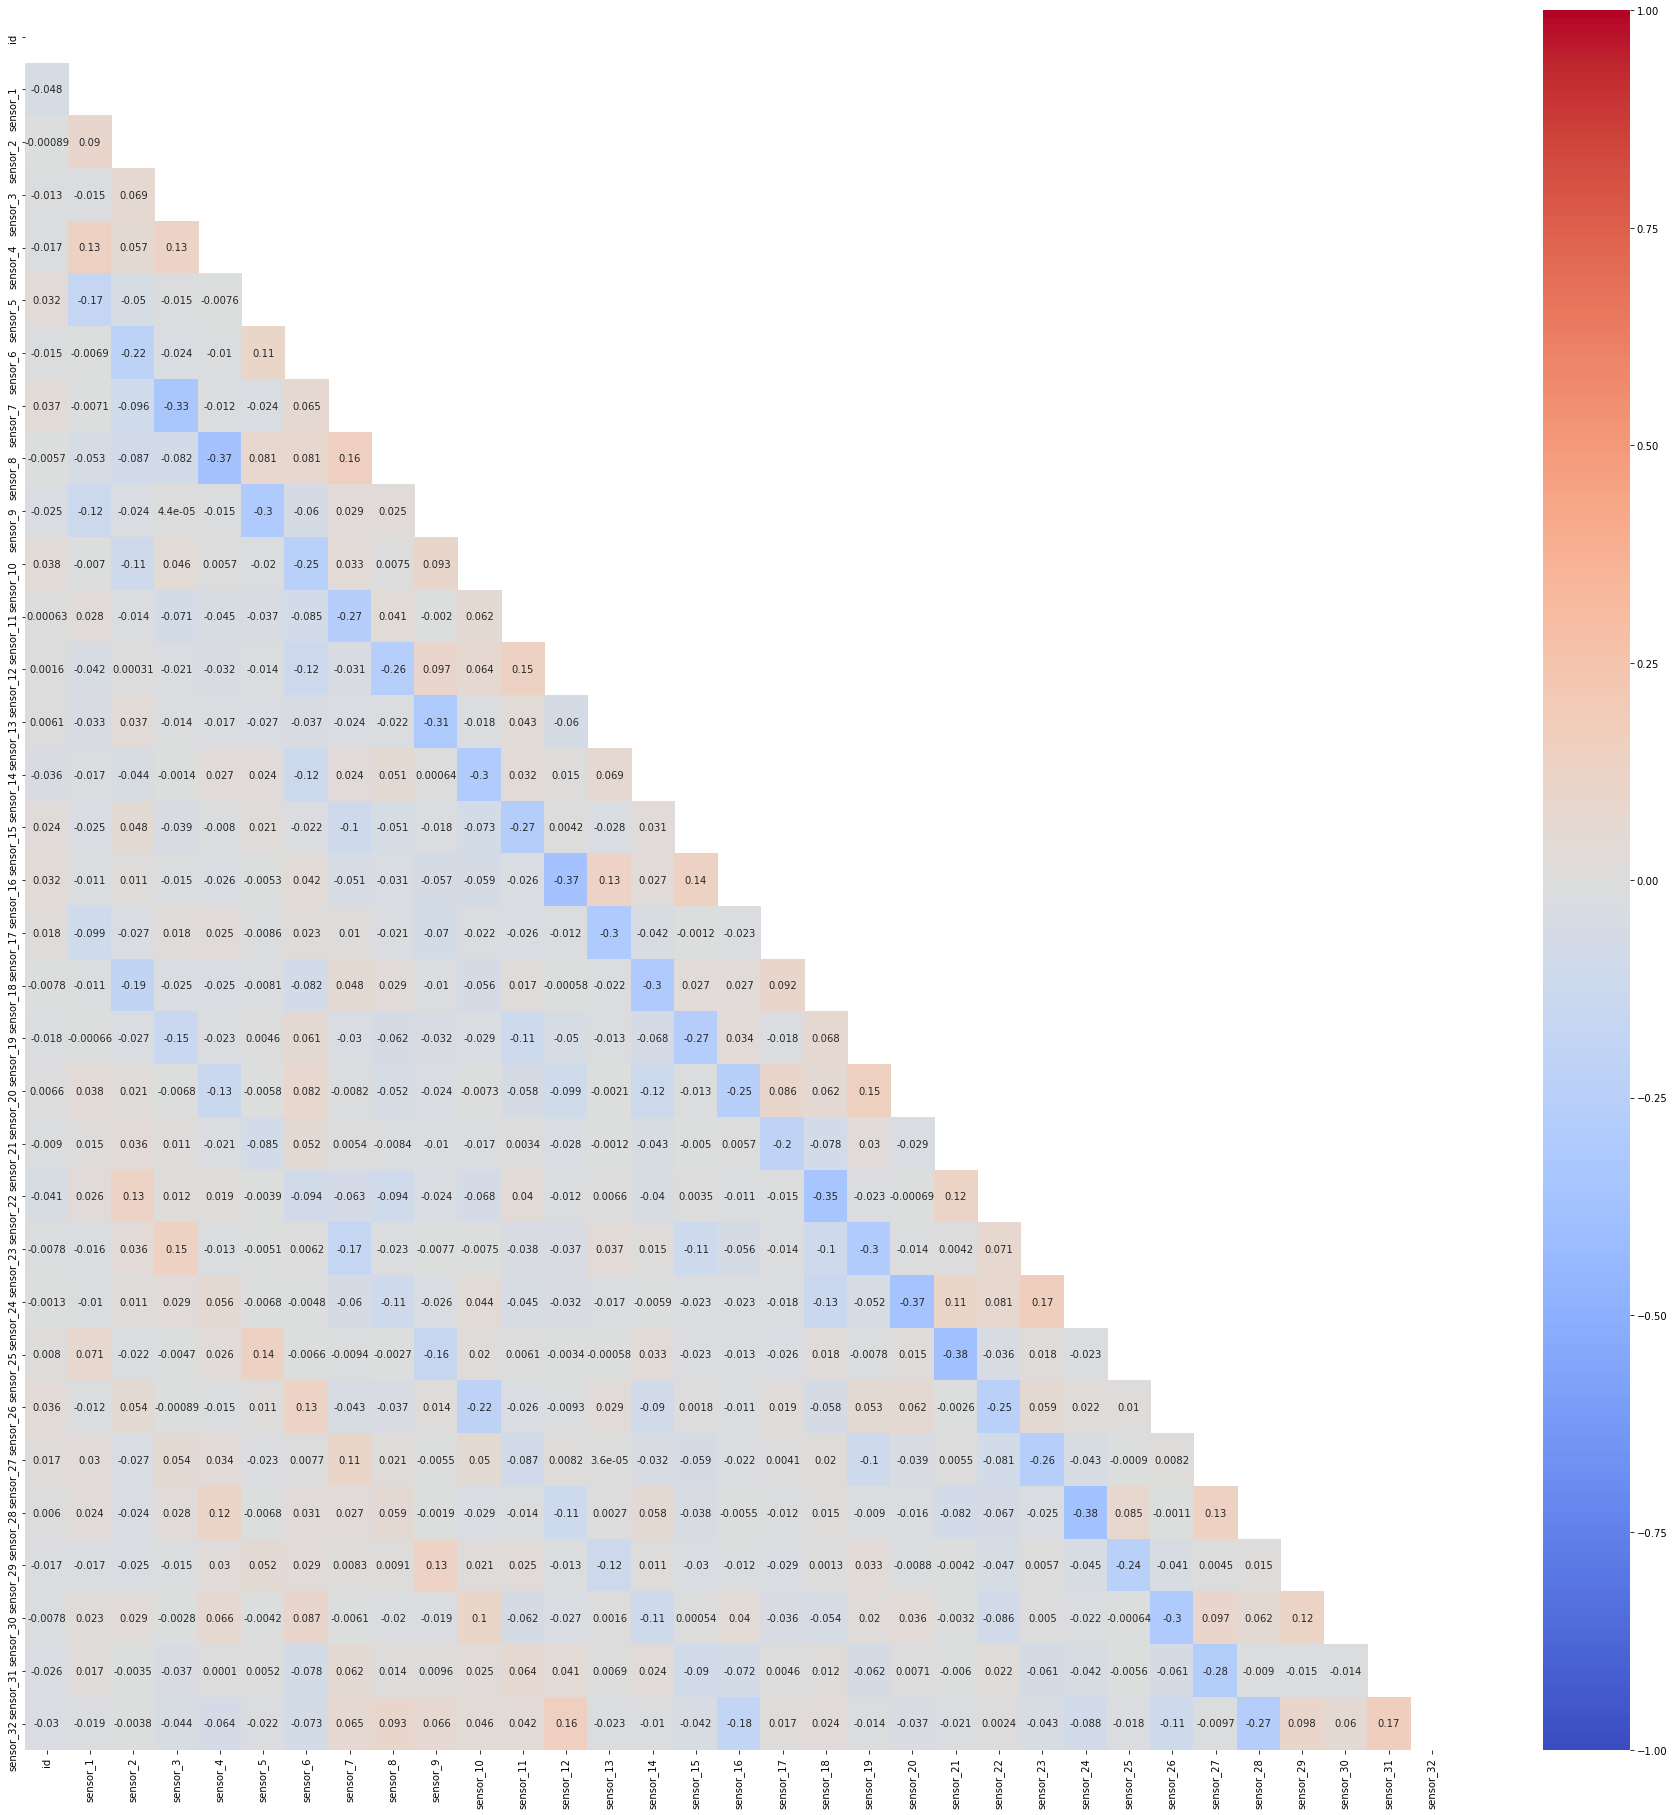

In [7]:
#히트맵 그리기
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

plt.figure(figsize=(32,32))

upp_mat = np.triu(X.corr())

sns.heatmap(X.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

In [8]:
#id 제거
sensor.drop(["id"],axis=1,inplace=True)

### valid set 만들기

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data=sensor.drop('target',axis=1)
target=sensor['target']

#train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(data, target,test_size=0.2, shuffle=True, stratify=target, random_state=34)

## 모델 선택과 훈련
### 지도학습 
- 분류
    - knn
    - randomforest
    - NB
    - pca -> randomforest

In [11]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
print(clf.score(x_valid,y_valid))

0.7794432548179872


In [30]:
#하이퍼파라미터 조정
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [150, 200],
           'max_depth' : [6, 8, 12, 15],
           'min_samples_leaf' : [8, 18, 32 ],
           'min_samples_split' : [8, 18, 32]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 200}
최고 예측 정확도: 0.7264


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

In [ ]:
#Random Forest의 각 피처의 중요도 시각화 : featureimportances
plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
prediction=knn.predict(x_valid)
(prediction==y_valid).mean()
knn.score(x_valid, y_valid)

0.5267665952890792

In [16]:
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    score=knn.score(x_valid, y_valid)
    print('k:%d,accuracy:%.2f'%(k,score*100))
    

k:1,accuracy:49.89
k:2,accuracy:52.68
k:3,accuracy:52.46
k:4,accuracy:51.82
k:5,accuracy:51.82
k:6,accuracy:50.96
k:7,accuracy:50.54
k:8,accuracy:50.75
k:9,accuracy:49.89
k:10,accuracy:49.46
k:11,accuracy:49.25
k:12,accuracy:48.18
k:13,accuracy:48.61
k:14,accuracy:48.61
k:15,accuracy:47.54
k:16,accuracy:46.90
k:17,accuracy:47.11
k:18,accuracy:45.18
k:19,accuracy:45.40


In [17]:
#NB
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
y_pred=nb.fit(x_train, y_train).predict(x_valid)
error=(y_valid!=y_pred).sum()
accuracy=1-error/len(y_valid)
print(accuracy)

0.6509635974304069


In [18]:
#PCA
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler().fit_transform(x_train)
x_scaled=pd.DataFrame(x_scaled)
features=x_scaled.T

In [19]:
import numpy as np
covariance_matrix=np.cov(features)
print(covariance_matrix)

[[ 1.00053562e+00  9.40540360e-02 -5.77744811e-04 ...  2.58803344e-03
   1.03904799e-02 -2.16369395e-02]
 [ 9.40540360e-02  1.00053562e+00  6.76981319e-02 ...  4.35803590e-02
  -2.27592534e-02 -4.66643205e-02]
 [-5.77744811e-04  6.76981319e-02  1.00053562e+00 ... -4.83862876e-03
  -4.99852134e-02 -3.42718530e-02]
 ...
 [ 2.58803344e-03  4.35803590e-02 -4.83862876e-03 ...  1.00053562e+00
  -9.35262837e-03  8.47095605e-02]
 [ 1.03904799e-02 -2.27592534e-02 -4.99852134e-02 ... -9.35262837e-03
   1.00053562e+00  1.59690838e-01]
 [-2.16369395e-02 -4.66643205e-02 -3.42718530e-02 ...  8.47095605e-02
   1.59690838e-01  1.00053562e+00]]


In [20]:
eig_vals, eig_vecs=np.linalg.eig(covariance_matrix)

In [21]:
eig_vals[0]/sum(eig_vals)

0.06217840413534918

In [22]:
a=0
i=0
while a/sum(eig_vals)<0.85:
    a+=eig_vals[i]
    i+=1
print(i)
print(a/sum(eig_vals))

27
0.8528018093860503


In [23]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_valid_scaled=ss.transform(x_valid)
y_train=np.array(y_train)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc=RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)
display(rfc.score(x_train_scaled,y_train))

1.0

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=28)
pca.fit(x_train_scaled)
x_train_scaled_pca=pca.transform(x_train_scaled)
x_valid_scaled_pca=pca.transform(x_valid_scaled)

In [26]:
rfc=RandomForestClassifier()
rfc.fit(x_train_scaled_pca, y_train)

RandomForestClassifier()

In [27]:
rfc.score(x_valid_scaled_pca, y_valid)

0.6788008565310493

In [42]:
submission

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,3
9339,9340,1
9340,9341,2
9341,9342,0


In [31]:
#하이퍼파라미터 조정
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(x_train_scaled_pca, y_train)
rs.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

In [38]:
rfc=RandomForestClassifier(n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features='log2', max_depth=11, bootstrap=True)
rfc.fit(x_train_scaled_pca, y_train)

RandomForestClassifier(max_depth=11, max_features='log2', min_samples_leaf=2,
                       n_estimators=700)

In [39]:
rfc.score(x_valid_scaled_pca, y_valid)

0.6895074946466809

## 테스트 세트

#### validation세트accuracy가 가장 높았던 randomforest모델을 적용하겠습니다.

In [40]:
test=pd.read_csv("C:/Users/user/Desktop/test.csv")

In [41]:
test.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


In [42]:
#테스트 셋 준비
x_test=test.drop(['id'],axis=1)

In [43]:
#예측
pred=clf.predict(x_test)

In [44]:
#제출용 sample파일을 불러옵니다.
submission=pd.read_csv('C:/Users/user/Desktop/sample_submission.csv')
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [45]:
submission['target']=pred

In [46]:
submission.to_csv('submit.csv',index=False)